# Exploratory data analysis 

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

In [174]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [175]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Missing Data

In [176]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [177]:
for feature in df.columns:
    print(feature,df[feature].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [178]:
features_with_na=[feature for feature in df.columns if (df[feature].isnull().sum())>1]

In [179]:
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean(),4))

Age 0.1987
Cabin 0.771
Embarked 0.0022


In [180]:
here we can observe that age is missing nearly 20% values in it and cabin is missing 77% values.

SyntaxError: invalid syntax (Temp/ipykernel_9248/3939268160.py, line 1)

In [181]:
for feature in df.columns:
    print(feature,df[feature].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


<AxesSubplot:>

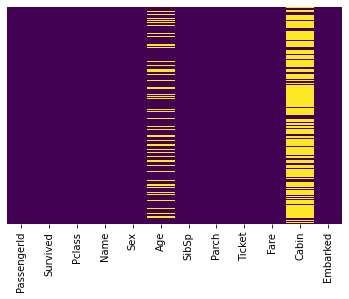

In [182]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### here we can observe that age and cabin having more null values 

Here age is less no of Null values so we can replace them but cabin is having more null values.If cabin is not play any crucial role for dependent feature then we have replace with some values if not we can drop that column completely

<AxesSubplot:xlabel='Cabin'>

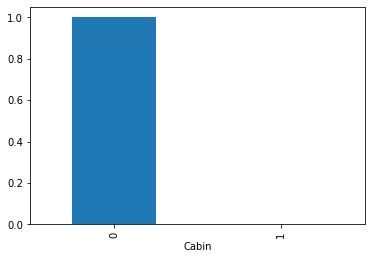

In [183]:
data=df.copy()
data['Cabin']=np.where(df['Cabin'].isnull(),1,0)

data.groupby('Cabin')['Survived'].median().plot.bar()

here we can observe that survived feature is not depend on cabin

<AxesSubplot:xlabel='Survived', ylabel='count'>

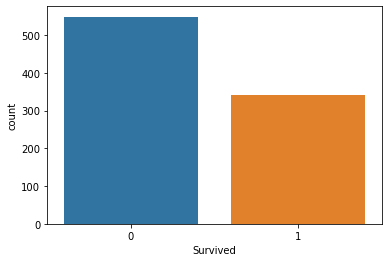

In [184]:
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

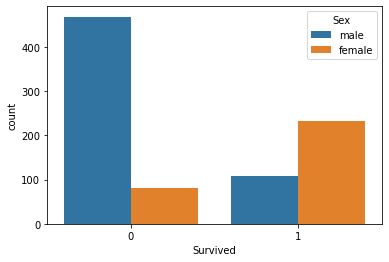

In [185]:
sns.countplot(x='Survived',hue='Sex',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

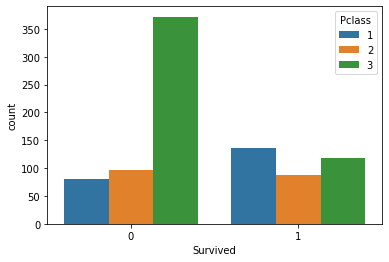

In [186]:
sns.countplot(x='Survived',data=df,hue='Pclass')

here we can observe that 3rd Pclass are died more when compared to other classes

C:\Users\wwwka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

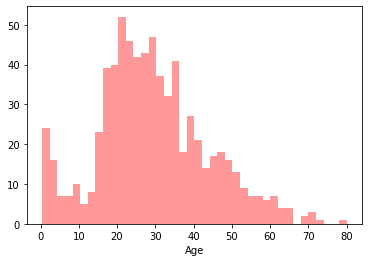

In [187]:
sns.distplot(df['Age'].dropna(),kde=False,color='red',bins=40)

<AxesSubplot:>

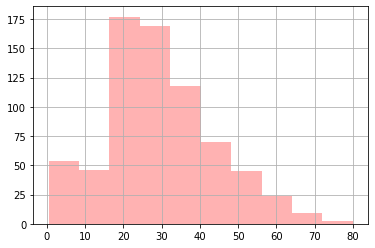

In [188]:
df['Age'].hist(color='red',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

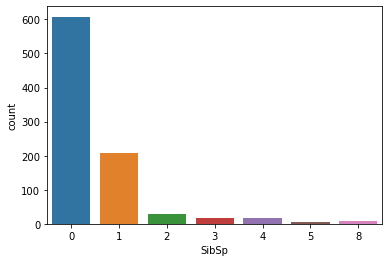

In [189]:
sns.countplot(x='SibSp',data=df)

# Data Cleaning

we will fill the mean in missing values instead of dropping that column

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

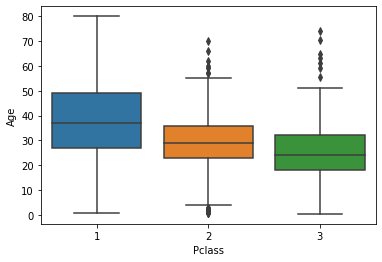

In [190]:
sns.boxplot(x='Pclass',y='Age',data=df)

we can see that all are mostly aged in higher class.So,We will use these average age values to impute based on Pclass for Age
Here we can see that average age of 1st Pclass is nearly 37,average age of 2nd Pclass is 29 and average age of 3rd class is 24 

In [191]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [192]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

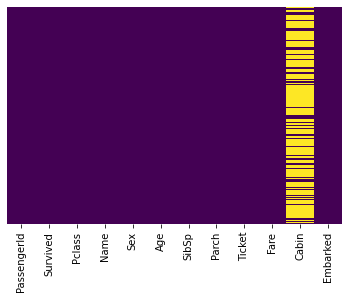

In [193]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

As Cabin is having more null values if we replace with anything also we will get bad results.So it is better to drop that column

In [194]:
df.drop('Cabin',axis=1,inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:>

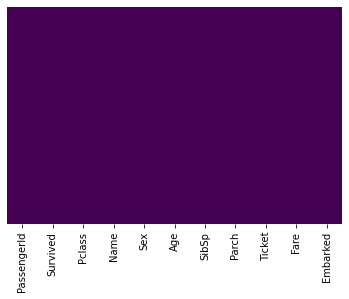

In [195]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

so cabin is dropped,so no null values present in features

# Converting Categorical Features

We will need to convert categorical features to dummy variables using pandas.Otherwise our machine learning algorithm won't be able to directly take in those features as inputs

In [196]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [197]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [198]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)#we have to remove which are not important

In [199]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [206]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set

# Train Test Split

In [288]:
df.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [289]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.30)

# Training and Predicting

In [292]:
from sklearn.linear_model import LogisticRegression

In [293]:
logmodel=LogisticRegression()

In [294]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [295]:
predictions=logmodel.predict(X_test)

In [296]:
from sklearn.metrics import confusion_matrix

In [297]:
acc=confusion_matrix(y_test,predictions)

In [298]:
acc

array([[139,  33],
       [ 50,  46]], dtype=int64)

In [299]:
from sklearn.metrics import accuracy_score,classification_report

In [300]:
accuracy=accuracy_score(y_test,predictions)
accuracy

0.6902985074626866

In [301]:
predictions

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [302]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       172
           1       0.58      0.48      0.53        96

    accuracy                           0.69       268
   macro avg       0.66      0.64      0.65       268
weighted avg       0.68      0.69      0.68       268

